## Assignment 1 ##
**Deadline: March 1st, 2014, midnight**

<a target="_blank" href="https://colab.research.google.com/github/RodrigoAVargasHdz/CHEM-4PB3/blob/w2024/Course_Notes/assigment1_answers.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
# !pip install py3Dmol

1. Load the data from the paper: <br>
   [Using Gradients in Permutationally Invariant Polynomial Potential Fitting: A Demonstration for CH4 Using as Few as 100 Configurations, JCTC **15** (5), 2826 (2019).](https://pubs.acs.org/doi/10.1021/acs.jctc.9b00043)

This data set contains different geometries of methane, the electronic energy and the forces. 
We will be fitting the Potential energy surface for methane ($\text{CH}_4$). 

In [2]:
# load all the necessary libraries that you will require for this assignment here
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

## Basic data analysis ##
1. Load the data using Pandas using the url: 
```python
data_url = "https://github.com/RodrigoAVargasHdz/CHEM-4PB3/raw/w2024/Course_Notes/data/methane.csv"
```
2. Inspect the data,
   1. How many data points the data has?
   2. What type of information the data has?
   3. What is the geometry with the lowest energy? 
   
(tips)<br>
Each geometry data point is a flat vector of (5*3). If reshaped to a (5,3), ```np.reshape(x,(5,3))```, each row corresponds to the xyz coordinate of each atom. <br>
Form the original file, the order of the atoms are ```['H','H','H','C']```

In [3]:
data_url = "https://github.com/RodrigoAVargasHdz/CHEM-4PB3/raw/w2024/Course_Notes/data/methane.csv"
data = pd.read_csv(data_url)


You can use the following function ```draw_molecule()``` to plot individual geometries.

In [4]:
def get_xyz_str(z, xyz):
    n_atoms = len(z)
    xyz_ = []
    xyz_str = '%s\n * (null), Energy   -1000.0000000\n' % (n_atoms)
    for zi, xyzi in zip(z, xyz):
        xyzi_str = '%s     %.4f     %.4f     %.4f\n' % (
            zi, float(xyzi[0]), float(xyzi[1]), float(xyzi[2]))
        xyz_str += xyzi_str
    return xyz_str


def draw_molecule(view, z, xyz):
    """_summary_

    Args:
        view (_type_): py3dmol class
        z (_type_): atomic numbers, list for CH4, z = ['H','H','H','H','C']
        xyz (_type_): xyz coordinates in numpy array 
    """
    xyz_str = get_xyz_str(z, xyz)
    view.addModel(xyz_str, 'xyz')
    view.setStyle({'sphere': {'radius': 0.35}, 'stick': {'radius': 0.1}})
    view.zoomTo()
    view.update()
    view.clear()

'''
#Example Ozone
z = ['O','O','O']
xyz = np.array([[0.4496,   0.0000000,   0.0000000],
    [-0.2248,   0.0000000,  1.0927],
    [ -0.2248,  0.0000000,  -1.0927]])
view = py3Dmol.view(width=400, height=400)
view.show()
draw_molecule(view, z, xyz)
'''

"\n#Example Ozone\nz = ['O','O','O']\nxyz = np.array([[0.4496,   0.0000000,   0.0000000],\n    [-0.2248,   0.0000000,  1.0927],\n    [ -0.2248,  0.0000000,  -1.0927]])\nview = py3Dmol.view(width=400, height=400)\nview.show()\ndraw_molecule(view, z, xyz)\n"

In [5]:
# code here!
geometries = data.iloc[:, 2:5*3+2].to_numpy()
forces = data.iloc[:, 5*3+2:].to_numpy()
energy = data['Energy'].to_numpy()

print('Total number of points:', energy.shape[0])
print('Name of the columns:', data.columns[2:])

i_min = np.argmin(energy)
x_min = geometries[i_min]
e_min = energy[i_min]

z = ['H', 'H', 'H', 'H', 'C']
x_min = np.reshape(x_min,(5,3))
print(f'The geometry with the lowest energy was {i_min}, with the energy {e_min:.3f} Ha; with the following XYZ coordinates.')
print(x_min)

# view = py3Dmol.view(width=400, height=400)
# view.show()
# draw_molecule(view, z, xyz)

Total number of points: 9000
Name of the columns: Index(['H1x', 'H1y', 'H1z', 'H2x', 'H2y', 'H2z', 'H3x', 'H3y', 'H3z', 'H4x',
       'H4y', 'H4z', 'Cx', 'Cy', 'Cz', 'FH1x', 'FH1y', 'FH1z', 'FH2x', 'FH2y',
       'FH2z', 'FH3x', 'FH3y', 'FH3z', 'FH4x', 'FH4y', 'FH4z', 'FCx', 'FCy',
       'FCz'],
      dtype='object')
The geometry with the lowest energy was 130, with the energy -40.484 Ha; with the following XYZ coordinates.
[[-0.1537962  0.5306777 -0.9387178]
 [ 0.3723592 -1.0207553 -0.1995925]
 [ 0.7098917  0.5509993  0.6413219]
 [-0.969631  -0.0668377  0.5231244]
 [ 0.0019537 -0.001484  -0.0019173]]


3. Plot the histogram of the energies for $\text{CH}_4$. <br>
   **(grad students):** Over the histogram fit a **Gaussian Density estimation model**, you are allowed to use Scikit-Learn package, [link](https://scikit-learn.org/stable/modules/density.html).<br>
   
4. From the histogram what can you tell? 

Text(0, 0.5, 'Density')

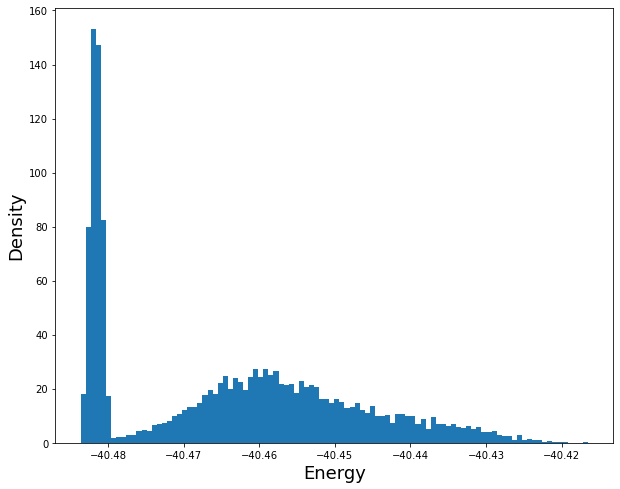

In [6]:
# code here!

plt.figure(figsize=(10,8))
plt.hist(energy,bins=100,density=True)
plt.xlabel('Energy',fontsize=18)
plt.ylabel('Density', fontsize=18)
# plt.plot()

Text(0, 0.5, 'Density')

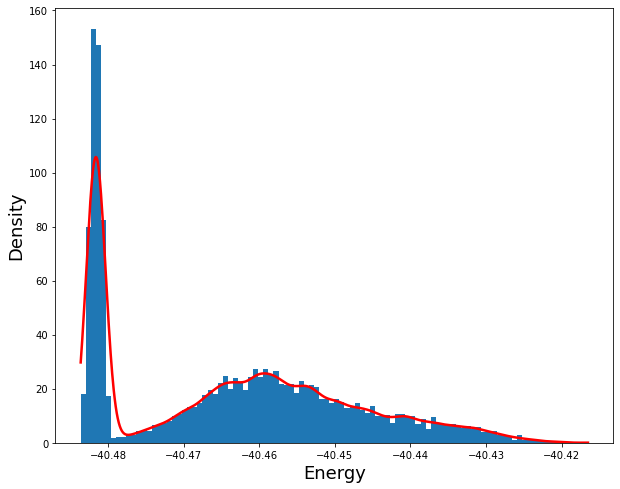

In [7]:
# grad students
from sklearn.neighbors import KernelDensity as kde

model = kde(kernel="gaussian", bandwidth=1E-3).fit(energy[:, None])
energy_grid = np.linspace(np.min(energy),np.max(energy),1000)
log_dens = model.score_samples(energy_grid[:, None])

plt.figure(figsize=(10, 8))
plt.hist(energy, bins=100, density=True,)

plt.plot(energy_grid,np.exp(log_dens),lw=2.5,c='red')
plt.xlabel('Energy', fontsize=18)
plt.ylabel('Density', fontsize=18)

## Training, validation and test data splitting ##
Code a function that will split the training data into, training, validation and test. Your function must accept two integers, one that represents the number of training points and the second represent the validation data points.<br>
**The splitting must be random**, and you are allowed to use Scikit-Learn's function, [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

```python
    def split_data(n_tr,n_val):

        # split the data into training, validation and test
    
    return (X_tr,y_tr),(X_val,y_val),(X_tst,y_tst)
```

In [8]:
# code here!
from sklearn.model_selection import train_test_split

def split_data(data, n_tr,n_val):
    X,y = data
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=n_tr, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(
        X_test, y_test, train_size=n_val, random_state=42)
    return (X_train, y_train),(X_val,y_val),(X_test,y_test)

# PES: Potential Energy surface model #

For all the following models, we will use the interatomic distances between all atoms as the input for the PES models. 

For each geometry compute interatomic distances between all atoms, 
   $$
   r(x^i,x^j) = \sum_{\ell} (x^i_\ell - x^j_\ell)^2, 
   $$
where $x^i$ is the XYZ coordinates of atom $i$ and $x^j$ is the XYZ coordinates of the atom $j$. <br>
(tip)  <br>
You can use ```np.lingalg.norm()``` and expand the dimensions of the array. 
The final vector should be the distance between <br>
```[H1-H2, H1-H3, H1-H4, H2-H3, H2-H4, H3-H4, C-H1, C-H2, C-H3, C-H4]```


In [9]:
# code here!

X = np.reshape(geometries,(geometries.shape[0],5,3)) # reshape to (n,5,3)
diff_Xij = np.expand_dims(X, axis=-2) - np.expand_dims(X, axis=-3) # compute all pair-wise distance between the atoms of each geometry. Output: (n,5,3,3)
diff_X = np.linalg.norm(diff_Xij, axis=(-1)) # distance norm
rows, cols = np.triu_indices(5,1) # indices of the upper triangular of the distance matrix
R = diff_X[:, rows, cols] # pair wise distance matrix

1. For each interatomic distance create a histogram showcasing the range of the data points, plot all of them in a single figure (**not individual**).<br>
   To plot all histograms in a single figure you can use the [mosaic fuction](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot_mosaic.html#matplotlib.pyplot.subplot_mosaic) from Matplotlib, or [subplots](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.subplots).
   To each panel add the title of what distance it is referred to. 

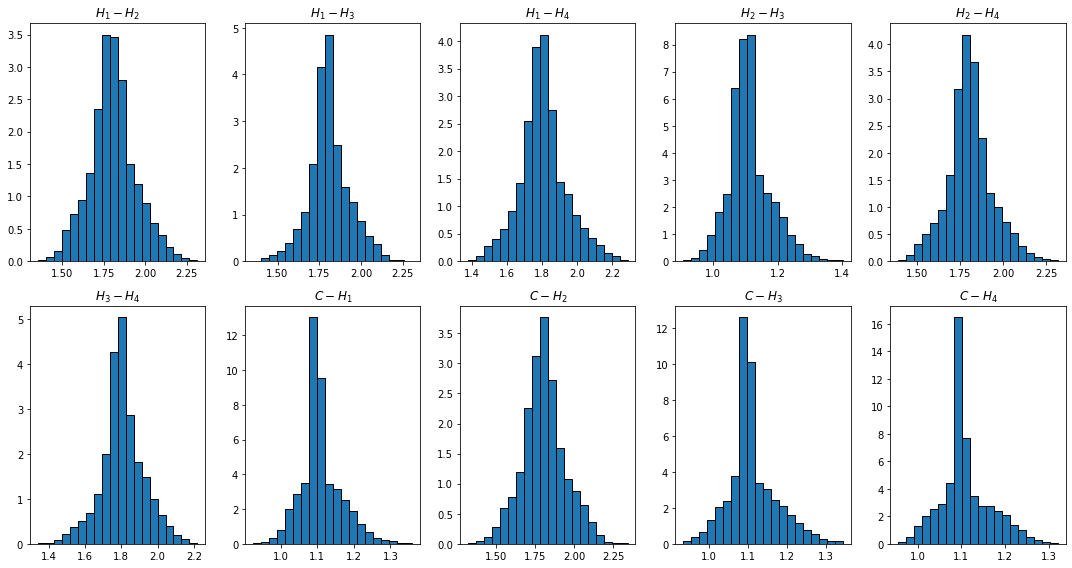

In [10]:
# code here!

distances = [
    '$H_{1}-H_{2}$',
    '$H_{1}-H_{3}$',
    '$H_{1}-H_{4}$',
    '$H_{2}-H_{3}$',
    '$H_{2}-H_{4}$',
    '$H_{3}-H_{4}$',
    '$C-H_{1}$',
    '$C-H_{2}$',
    '$C-H_{3}$',
    '$C-H_{4}$'
]

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(15, 8))

# Loop through the data and plot histograms
for i, ax in enumerate(axs.flat):
    ax.hist(R[:,i], bins=20, edgecolor='black',density=True)
    ax.set_title(distances[i])


plt.tight_layout()
plt.show()

## Linear models ##
The original paper used a polynomial based expansion to fit the PES for $\text{CH}_4$, however, we first will use only the distances as the input for our model,
$$
f(\mathbf{w},\mathbf{r}) = \mathbf{w}^\top \mathbf{r} = \sum_i w_i r_i
$$
where $r_i$ is one of the interatomic distances. 

1. Fit a linear model with and without a regularization term. You can use the code from the lecture. 
2. For the Least square with regularization model, do a cross-validation search procedure to optimize the value of $\lambda$ (**only using the training data**).

**Details:** <br>
Consider **50** training data points and **250** validation points. You must also use an additional **1,000** test points to assess the accuracy of the model. 

**Some analysis** <br>
Using the validation data, compare both models and report the optimal value of $\lambda$ found.<br>
You can do a prediction vs true plot to see the results of the models.


In [11]:
def linear_model_solver(X, y, bool_bias = True):
    if bool_bias:
        X = np.column_stack((X,np.ones(y.shape[0])))
        
    Xt = X.T
    A = Xt@X
    z = Xt@y
    A_inv = np.linalg.inv(A)
    w = A_inv@z
    
    if bool_bias:
        return w[:-1],w[-1]
    else:
        return w 
    

def linear_model_solver_w_reg(X, y, l=1E-3, bool_bias = True):
    if bool_bias:
        X = np.column_stack((X, np.ones(y.shape[0])))
        
    A = X.T@X + l * np.eye(X.shape[1], X.shape[1])
    w = np.linalg.inv(A)@(X.T@y)
    
    if bool_bias:
        return w[:-1], w[-1]
    else:
        return w

In [12]:
def linear_model(X,w,b=0.):
    return X@w + b

In [13]:
def f_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

def r_square(y_true, y_pred):
    # compute ss_res
    ss_res = np.sum((y_true - y_pred)**2)

    # compute ss_tot
    y_mean = np.mean(y_true)
    ss_tot = np.sum((y_pred - y_mean)**2)

    r2 = 1 - (ss_res/ss_tot)
    return r2

In [14]:
#code here!
n_tr = 100
n_val = 250
y = energy
data = (R,y)
(X_tr,y_tr), (X_val,y_val),(X_test,y_test) = split_data(data, n_tr,n_val)

X_tst_small = X_test[:1000]
y_tst_small = y_test[:1000]

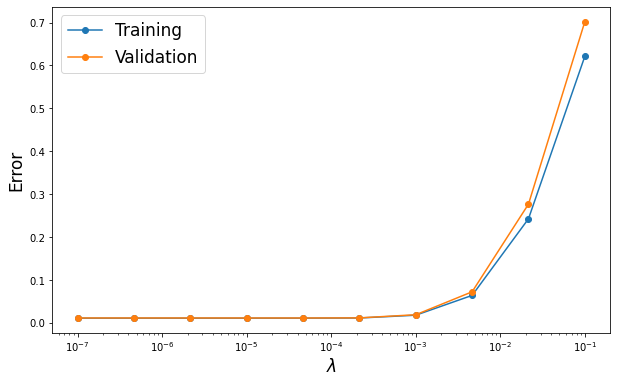

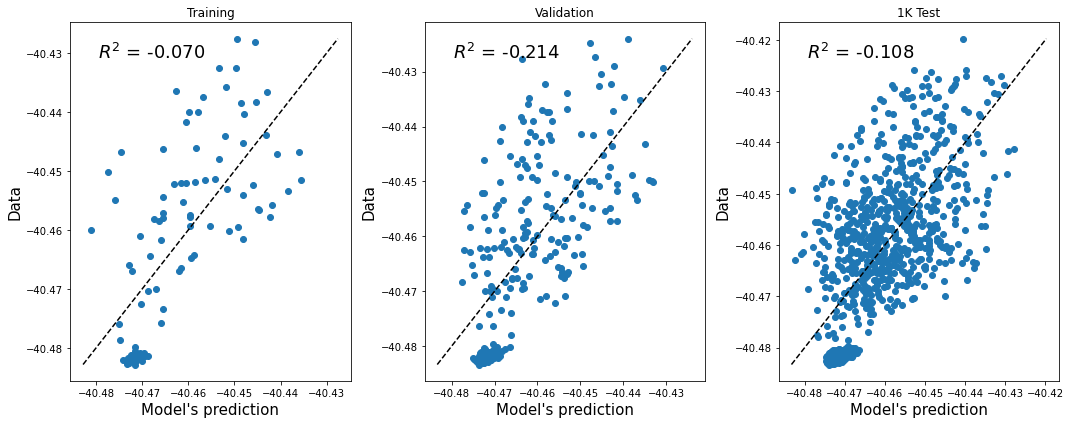

In [15]:
l_ = np.logspace(-7, -1, num=10, base=10)

error_tr = []
error_val = []
l_opt = 0.
error_opt = np.Inf
for li in l_:
    w,b = linear_model_solver_w_reg(X_tr,y_tr,li)
    
    y_pred = linear_model(X_tr,w,b)
    error_tr_li = f_rmse(y_pred,y_tr)
    error_tr.append(error_tr_li)
    
    y_pred = linear_model(X_val,w,b)
    error_val_li = f_rmse(y_pred,y_val)
    error_val.append(error_val_li)

    # lowest validation error
    if error_val_li < error_opt:
        w_opt,b_opt = w,b
        error_opt = error_val_li
        l_opt = li

plt.figure(figsize=(10,6))
plt.plot(l_,error_tr,marker='o',label = 'Training')    
plt.plot(l_, error_val, marker='o', label='Validation')
plt.xlabel(f'$\lambda$',fontsize=17)
plt.ylabel(f'Error', fontsize=17)
plt.legend(fontsize=17)
plt.xscale('log')


# prediction (like this we do not need to add 1s for the bias)
w,b = linear_model_solver_w_reg(X_tr,y_tr,l_opt)
y_pred_tr = X_tr@w + b
y_pred_val = X_val@w + b
y_pred_tst_small = X_tst_small@w + b


fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

data_name = ['Training','Validation','1K Test']
plot_data = ((y_tr,y_pred_tr),(y_val,y_pred_val),(y_tst_small,y_pred_tst_small))
# Loop through the data and plot histograms
for i, ax in enumerate(axs.flat):
    y_true,y_pred = plot_data[i]
    ax.scatter(y_pred,y_true)
    r2 = r_square(y_true,y_pred)
    ax.plot(np.linspace(np.min(y_true), np.max(y_true), 100), np.linspace(
        np.min(y_true), np.max(y_true), 100), color='k', ls='--')
    ax.text(0.1,0.9,f'$R^2$ = {r2:.3f}',fontsize=18,transform=ax.transAxes)
    ax.set_title(data_name[i])
    ax.set_xlabel("Model's prediction",fontsize=15)
    ax.set_ylabel("Data", fontsize=15)

plt.tight_layout()
plt.show()
    

## Polynomial linear models ##
The original paper used a polynomial based expansion to fit the PES for $\text{CH}_4$, however, we first will use only the distances as the input for our model,
$$
f(\mathbf{w},\mathbf{r}) = \mathbf{w}^\top \phi(\mathbf{r}) = \sum_i w_i  \phi_i(\mathbf{r})
$$
where $r_i$ is one of the interatomic distances and $ \phi(\mathbf{r})$ is the polynomial expansion. This model is more similar to the one used in the original [paper](https://pubs.acs.org/doi/10.1021/acs.jctc.9b00043).

* Fit a polynomial model with regularization term. You can use the code from the lecture. Use cross-validation search procedure to optimize the value of $\lambda$ (**only using the training data**).

**Details:** <br>
* Use the same training and validation data as the one used to fit the **Linear models**.<br>
* You are allow to use the function [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) from Scikit-Learn.


**Some analysis** <br>
Plot the validation error as a function of the polynomial degree, you can consider a space from 1 to 5. <br>

**(graduate students)**<br>
 Plot the optimal value of $\lambda$ also as a function of the polynomial degree.


In [16]:
# code here!
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
# (X0_tr,y0_tr),(X1_tr,y1_tr),(_,_) = split_data((X_tr,y_tr),)


def lambda_solver(X_tr, y_tr, X_val, y_val):
    l_grid = np.logspace(-7, -1, num=10, base=10)

    l_opt = 0
    error_min = np.inf
    for li in l_grid:
        w = linear_model_solver_w_reg(X_tr, y_tr, li,bool_bias=False)
        y_val_pred = X_val @ w
        error = f_rmse(y_val_pred, y_val)
        if error < error_min:
            l_opt = li
            error_min = error

    return l_opt

def solver_lambda(data,n_folds,deg):
    
    X_tr, y_tr = data
    kf = KFold(n_folds)

    l_results = []
    for train,val in kf.split(X_tr):
        X_tr_kfi, y_tr_kfi = X_tr[train], y_tr[train]
        X_val_kfi, y_val_kfi = X_tr[val], y_tr[val]
        
        l_opt = lambda_solver(X_tr_kfi, y_tr_kfi, X_val_kfi, y_val_kfi, )
        l_results.append(l_opt)

    l_results = np.array(l_results)
    l_opt_cv = np.mean(l_results)
    return l_opt_cv

In [17]:
n_folds = 5
p_  = np.arange(1,6) # grid over poly degrees
error_val_ = []
error_tr_ = []
l_opt_ = []
for pi in p_:
    poly = PolynomialFeatures(pi)
    Phi_tr = poly.fit_transform(X_tr)
    Phi_val = poly.fit_transform(X_val)
    data_tr = (Phi_tr, y_tr)
    l_opt = solver_lambda(data_tr, n_folds, pi)
    l_opt_.append(l_opt)
    w = linear_model_solver_w_reg(Phi_tr,y_tr,l_opt,bool_bias=False)

    y_tr_pred = Phi_tr@w
    rmse_i = f_rmse(y_tr_pred, y_tr)
    error_tr_.append(rmse_i)
    
    y_val_pred = Phi_val@w
    rmse_i = f_rmse(y_val_pred,y_val)
    error_val_.append(rmse_i)
    print(f'degree = {pi}, lambda = {l_opt:.5f}, RMSE = {rmse_i:.4f}, d = {w.shape[0]-1}')

degree = 1, lambda = 0.00005, RMSE = 0.0119, d = 10
degree = 2, lambda = 0.00000, RMSE = 0.0063, d = 65
degree = 3, lambda = 0.00000, RMSE = 0.0383, d = 285
degree = 4, lambda = 0.00025, RMSE = 0.1669, d = 1000
degree = 5, lambda = 0.00533, RMSE = 0.3966, d = 3002


([<matplotlib.axis.XTick at 0x144ddefa0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

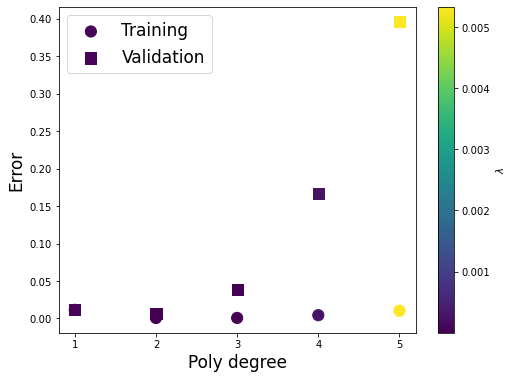

In [18]:
# Creating the scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(p_, error_tr_, c=l_opt_,
                      cmap='viridis', s=125, label='Training')
scatter = plt.scatter(p_, error_val_, c=l_opt_, marker='s',
                      cmap='viridis', s=125, label='Validation')
# Adding a colorbar
plt.colorbar(scatter, label=f'$\lambda$')
plt.legend(fontsize=17)
plt.xlabel('Poly degree', fontsize=17)
plt.ylabel('Error', fontsize=17)
plt.xticks(p_)

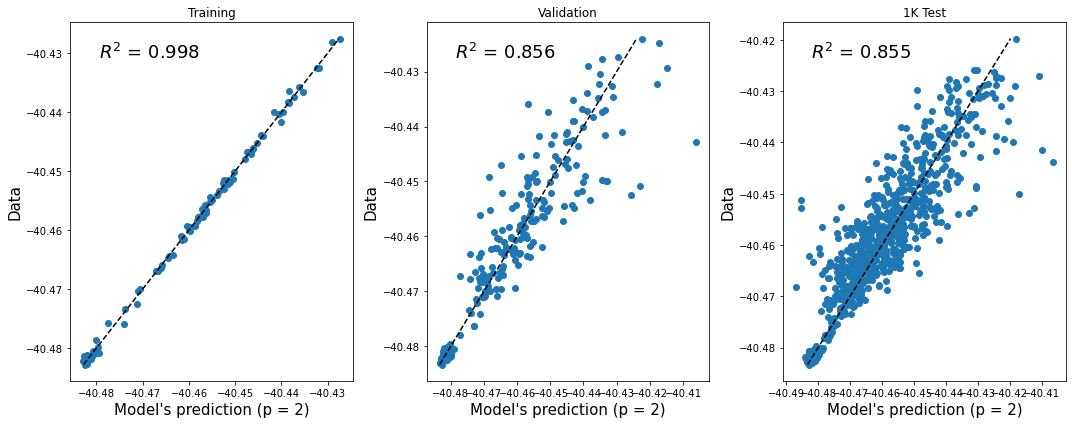

In [19]:
# prediction
p_opt = p_[np.argmin(error_val_)]
l_opt = l_opt_[np.argmin(error_val_)]
poly = PolynomialFeatures(p_opt)
Phi_tr = poly.fit_transform(X_tr)
Phi_val = poly.fit_transform(X_val)
Phi_tst_small = poly.fit_transform(X_tst_small)
w, b = linear_model_solver_w_reg(Phi_tr, y_tr, l_opt)
y_pred_tr = Phi_tr@w + b
y_pred_val = Phi_val@w + b
y_pred_tst_small = Phi_tst_small@w + b


# plotting
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

data_name = ['Training', 'Validation', '1K Test']
plot_data = ((y_tr, y_pred_tr), (y_val, y_pred_val),
             (y_tst_small, y_pred_tst_small))
# Loop through the data and plot histograms
for i, ax in enumerate(axs.flat):
    y_true, y_pred = plot_data[i]
    ax.scatter(y_pred, y_true)
    r2 = r_square(y_true, y_pred)
    ax.plot(np.linspace(np.min(y_true), np.max(y_true), 100), np.linspace(
        np.min(y_true), np.max(y_true), 100), color='k', ls='--')
    ax.text(0.1, 0.9, f'$R^2$ = {r2:.3f}', fontsize=18, transform=ax.transAxes)
    ax.set_title(data_name[i])
    ax.set_xlabel(f"Model's prediction (p = {p_opt})", fontsize=15)
    ax.set_ylabel("Data", fontsize=15)

plt.tight_layout()
plt.show()

## Kernel based modes for PES ##
In class, we also studied that a linear model could be transformed into a kernel model one by using the kernel trick. <br>
Using Scikit-Learn let's fir the PES for $\text{CH}_4$ using either the RBF or Matern kernel.
**Important links:**<br>
* [Kernel Ridge regression](https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html#sklearn.kernel_ridge.KernelRidge)
* [RBF](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.RBF.html#sklearn.gaussian_process.kernels.RBF)
* [Matern 2.5](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.Matern.html)

Train a kernel model using individual length scale parameters for each interatomic distance.<br>
According to the documentation of both kernels, one can define a ```length_scale``` as a vector where each element of the array corresponds to an individual length scale parameter. 


In [20]:
#code here!
from sklearn.gaussian_process import GaussianProcessRegressor as GP
from sklearn.gaussian_process.kernels import RBF, Matern
from sklearn.gaussian_process.kernels import ConstantKernel

l = np.random.rand(X_tr.shape[1])
kernel = ConstantKernel(constant_value=1.) * Matern(length_scale=l,nu=2.5)
# kernel = ConstantKernel(constant_value=1.) * RBF(length_scale=l)
model = GP(kernel=kernel, random_state=12,n_restarts_optimizer=20,)
model.fit(X_tr, y_tr)
print(
    f"Opt Kernel parameters: \n{model.kernel_} \n"
    f"Log-likelihood: {model.log_marginal_likelihood(model.kernel_.theta):.3f}"
)

/usr/local/anaconda3/envs/chem4pb3/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Opt Kernel parameters: 
13.7**2 * Matern(length_scale=[18.1, 12.5, 22.4, 463, 1e+05, 17.9, 1.2, 14.3, 4.59, 2.82e+04], nu=2.5) 
Log-likelihood: 338.412


/usr/local/anaconda3/envs/chem4pb3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 4 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


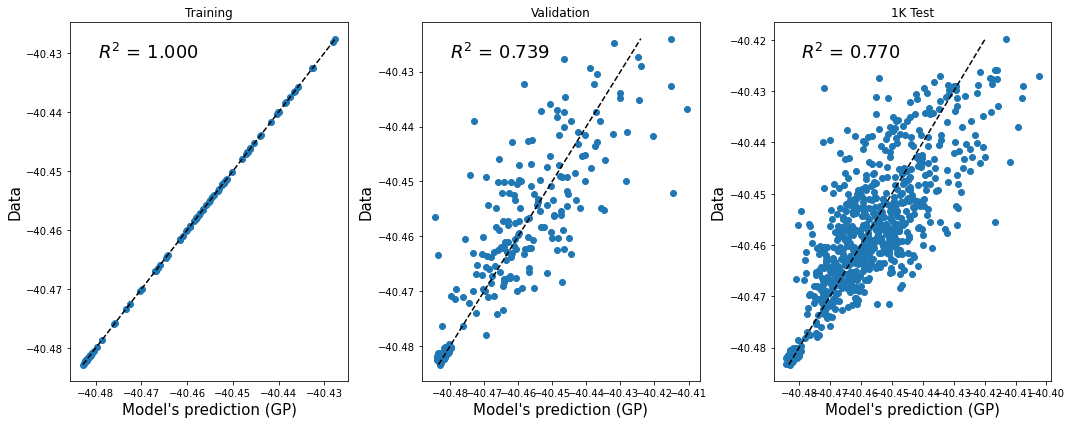

In [21]:
y_tr_pred_gp = model.predict(X_tr)
y_val_pred_gp = model.predict(X_val)
y_tst_small_pred_gp = model.predict(X_tst_small)

# plotting
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

data_name = ['Training', 'Validation', '1K Test']
plot_data = ((y_tr, y_tr_pred_gp), (y_val, y_val_pred_gp),
             (y_tst_small, y_tst_small_pred_gp))
# Loop through the data and plot histograms
for i, ax in enumerate(axs.flat):
    y_true, y_pred = plot_data[i]
    ax.scatter(y_pred, y_true)
    r2 = r_square(y_true, y_pred)
    ax.plot(np.linspace(np.min(y_true), np.max(y_true), 100), np.linspace(
        np.min(y_true), np.max(y_true), 100), color='k', ls='--')
    ax.text(0.1, 0.9, f'$R^2$ = {r2:.3f}', fontsize=18, transform=ax.transAxes)
    ax.set_title(data_name[i])
    ax.set_xlabel(f"Model's prediction (GP)", fontsize=15)
    ax.set_ylabel("Data", fontsize=15)

plt.tight_layout()
plt.show()

# PES Inspection #
Choosing one of the previously trained models, predict and plot the value of the energy as a function of the distance between **C-H** and **H-H**.
* For the **C-H** distance, consider the range of 0.9 $\AA$ to 1.7 $\AA$.
* For the **H-H** distance, consider the range of 1. $\AA$ to 2.4 $\AA$.

You can use the ground state geometry as reference for the other distances required as input to the model.

(tips)<br>
See Figure 5 as reference from the [original paper]((https://pubs.acs.org/doi/10.1021/acs.jctc.9b00043)).


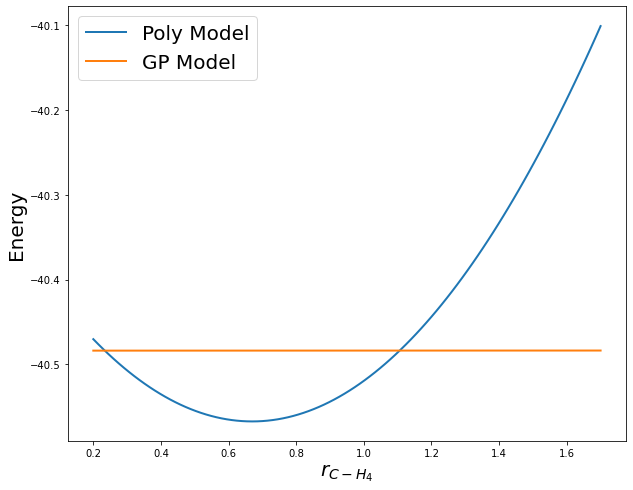

In [22]:
#code here!
# get the grid
n_grid = 100  #grid points
r_gs = R[i_min] # distances of the ground state geometry
R_grid = np.tile(r_gs,(n_grid,1)) # grid size array  
r_ch_grid = np.linspace(0.2, 1.7,n_grid) # C-H distance grid
R_grid[:,-1] = r_ch_grid # Let's only change the C-H4 distance with our grid
Phi_grid = poly.fit_transform(R_grid) # Transform to the model features 

# prediction
y_pred = Phi_grid@w + b
y_pred_gp = model.predict(R_grid)

plt.figure(figsize=(10,8))
plt.plot(r_ch_grid,y_pred,label='Poly Model',lw=2)
plt.plot(r_ch_grid, y_pred_gp, label='GP Model', lw=2)
plt.xlabel(r'$r_{C-H_{4}}$',fontsize=20)
plt.ylabel(r'Energy', fontsize=20)
plt.legend(fontsize=20)

[1.79724513 1.80080405 1.7775246  1.08859969 1.81424302 1.79811462
 1.10235643 1.79345747 1.10461336 1.1063077 ]


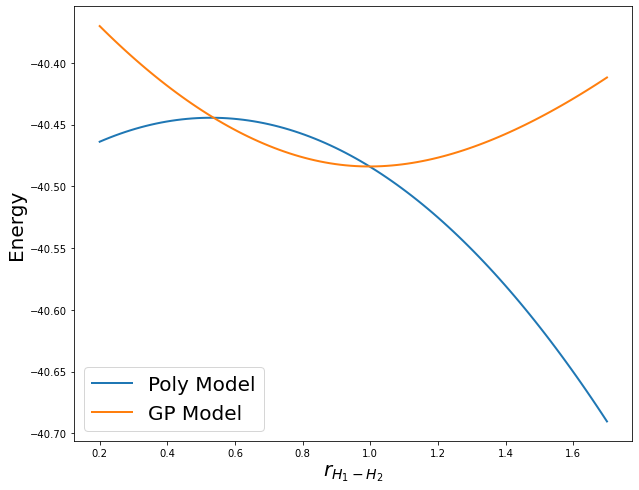

In [23]:
# code here!
# get the grid
n_grid = 100  # grid points
r_gs = R[i_min]  # distances of the ground state geometry
print(r_gs)
R_grid = np.tile(r_gs, (n_grid, 1))  # grid size array
r_hh_grid = np.linspace(1., 2.5, n_grid)  # H-H distance grid
R_grid[:, 0] = r_hh_grid  # Let's only change the H1-H2 distance with our grid
Phi_grid = poly.fit_transform(R_grid)  # Transform to the model features

# prediction
y_pred = Phi_grid@w + b
y_pred_gp = model.predict(R_grid)

plt.figure(figsize=(10, 8))
plt.plot(r_ch_grid, y_pred, label='Poly Model', lw=2)
plt.plot(r_ch_grid, y_pred_gp, label='GP Model', lw=2)
plt.xlabel(r'$r_{H_{1}-H_{2}}$', fontsize=20)
plt.ylabel(r'Energy', fontsize=20)
plt.legend(fontsize=20)